In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

from new_smooth_store import open_smoothdataset
from llcutils import get_atlantic
from matern import MaternField

In [380]:
#run_dir = '/scratch2/tsmith/generic-matern-covariance/sampling/llc90/matern-02-test/log10tol-03-3D-C/run.05dx.01xi/'
#run_dir = '/scratch2/tsmith/generic-matern-covariance/sampling/llc90/matern-02/log10tol-03-3D-C/run.05dx.01xi/'
run_dir = '/scratch2/tsmith/generic-matern-covariance/sampling/llc90/matern-01apps-test/log10tol-03-3D-C/run.10dx.01xi/'
diag_dir = run_dir + '/smooth-output'
grid_dir = '/scratch2/tsmith/generic-matern-covariance/sampling/llc90/grid/'

In [381]:
ds = open_smoothdataset(diag_dir, run_dir, geometry='llc', read_filternorm=True)#, iter_stop=20)

In [382]:
atl = get_atlantic(ds)

/scratch2/tsmith/miniconda3/envs/phd/lib/python3.9/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


In [383]:
run_dir2 = '/scratch2/tsmith/generic-matern-covariance/sampling/llc90/matern-02apps-eps2.5/log10tol-03-3D-C/run.10dx.01xi/'
diag_dir2 = run_dir2 + '/smooth-output'

In [384]:
ds2 = open_smoothdataset(diag_dir2, run_dir2, geometry='llc', read_filternorm=True)

In [385]:
atl2 = get_atlantic(ds2)

/scratch2/tsmith/miniconda3/envs/phd/lib/python3.9/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


In [386]:
kw = {'sample':50, 'k':0}

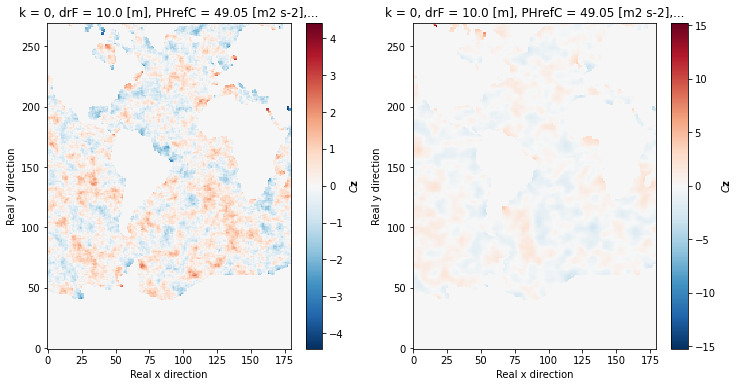

In [387]:
fig, axs = plt.subplots(1,2,figsize=(12,6))

for a, ax in zip([atl, atl2], axs):
    a.smooth3Dfld001.sel(kw).plot(x='ix',ax=ax)

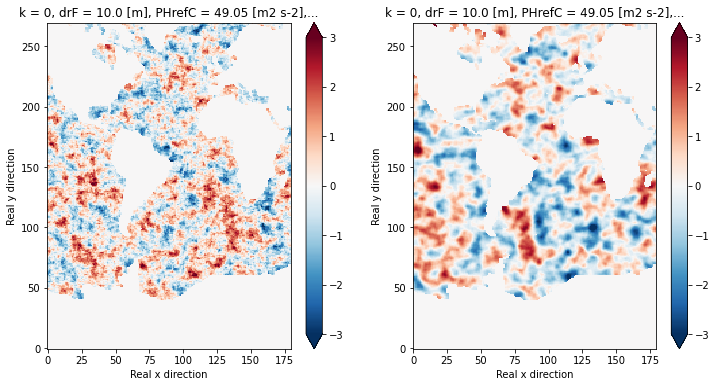

In [388]:
fig, axs = plt.subplots(1,2,figsize=(12,6))

for a, ax in zip([atl, atl2], axs):
    plotme = a.smooth3Dfld001*a.smooth3Dnorm001
    plotme.sel(kw).plot(x='ix',ax=ax,vmax=3)

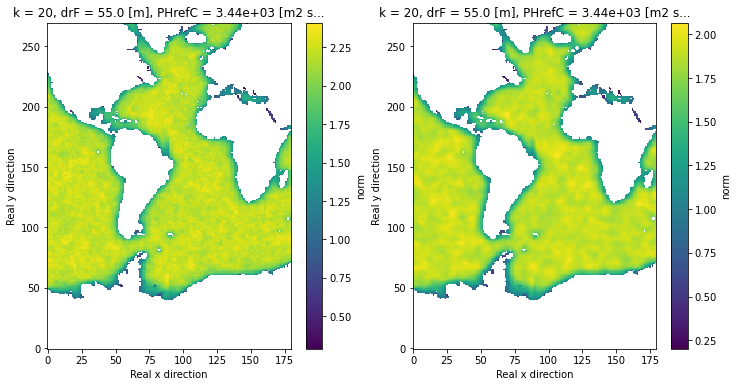

In [389]:
fig, axs = plt.subplots(1,2,figsize=(12,6))

for a, ax in zip([atl, atl2], axs):
    #plotme = xr.where(a.maskC,1/a.smooth3Dnorm001,0.)
    plotme = a.smooth3Dnorm001
    plotme.where(a.maskC).sel(k=20).plot(x='ix',ax=ax)

In [391]:
mf = MaternField(ds.maskC, n_range=10, horizontal_factor=1, n_applications=1)
mf2 = MaternField(ds2.maskC, n_range=10, horizontal_factor=1, n_applications=2)

sig = np.sqrt(mf.ideal_variance)
sig2= np.sqrt(mf2.ideal_variance)
print("sig, 1/sig: ",sig, 1/sig)
print("sig2, 1/sig2: ",sig2, 1/sig2)

sig, 1/sig:  0.44603102903819275 2.2419964865591715
sig2, 1/sig2:  0.5272876288349033 1.8964981260979015


In [377]:
1/sig2

4.626017995635262

In [378]:
mf.delta_hat

0.16

In [193]:
1/np.sqrt(sig2*sig)

5.832284036620678

In [223]:
dhat = lambda nrange,m: 8*(2*m-3/2) / nrange**2
eps = lambda m: 2*m - 3/2

In [224]:
eps(1)

0.5

In [226]:
eps(3)

4.5

In [328]:
dhat(5,2)

0.8

In [337]:
dhat(5,1)

0.16

In [336]:
dhat(5,2)

0.8

In [327]:
dhat(5,1)/0.5*2.5

0.8

In [272]:
dhat(10,2)

0.2

In [220]:
dhat(5,1)

0.16

In [222]:
dhat(5,2)*2

1.6

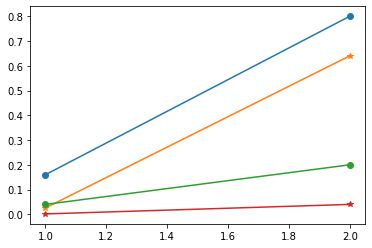

In [185]:
for n_range in [5,10]:
    x = np.arange(1,3)
    y = dhat(n_range, x)
    plt.plot(x,y,marker='o')
    plt.plot(x,y**2,marker='*')

In [147]:
dhat(5,1)**2

0.0256

In [148]:
dhat(10,1)

0.04

In [144]:
.04*.04

0.0016

In [142]:
.8*.8

0.6400000000000001

In [165]:
sig2

0.09321216449623387

In [156]:
1/sig

3.170661838084809

In [134]:
1/sig2

1.8964981260979015

In [92]:
mf.mean_differentiability

0.5

In [90]:
mf.delta_hat

0.16

In [91]:
mf2.delta_hat

0.8

In [68]:
1/sig

3.170661838084809

In [66]:
1/sig2

10.728213483771249

In [58]:
1/sig2/sig

6.013154234417968

In [35]:
1/sig

2.2419964865591715

In [37]:
sig/sig2

0.14953487812212204

In [ ]:
xr.where(atl.maskC,1/atl.smooth3Dnorm001, np.nan).sel(k=0,ix=slice(80,100),iy=slice(60,100)).plot()

In [97]:
atl.smooth3Dnorm001.where(atl.maskC).mean().values

array(1.2721118, dtype=float32)

In [5]:
from matern import MaternField

In [6]:
mf = MaternField(ds.maskC, n_range=5, horizontal_factor=1, n_applications=1)

In [7]:
kw = {'k':0, 'face':4}

/scratch2/tsmith/miniconda3/envs/phd/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


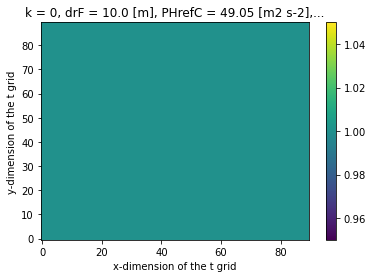

In [8]:
(mf.cell_volume/mf.detPhi).sel(kw).plot()

In [10]:
mf.delta.sel(kw).mean().values

/scratch2/tsmith/miniconda3/envs/phd/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


array(0.16, dtype=float32)

/scratch2/tsmith/miniconda3/envs/phd/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


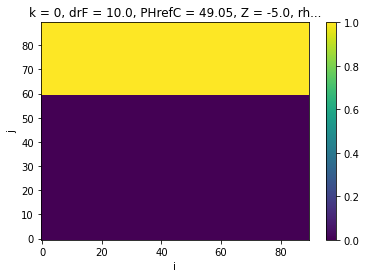

In [12]:
mf.rhs_factor.sel(k=0,face=3).plot()

In [103]:
mf.mean_differentiability

2.5

In [100]:
mf.n_dims

3

In [111]:
1/np.sqrt(mf.ideal_variance)

10.728213483771249

In [18]:
mf.ideal_variance

0.19894367886486916